<a href="https://colab.research.google.com/github/dhoumaima/SugarSense/blob/master/SugerSanceBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DiabetesPrediction").getOrCreate()


**-Monter Google Drive :**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

file_path = "/content/drive/MyDrive/diabetes.csv"

df = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



**-Convertir en Pandas :**

In [ ]:
df_pandas = df.toPandas()


# **-Courbe :**

**-Distribution de la Glycémie (Glucose) :**

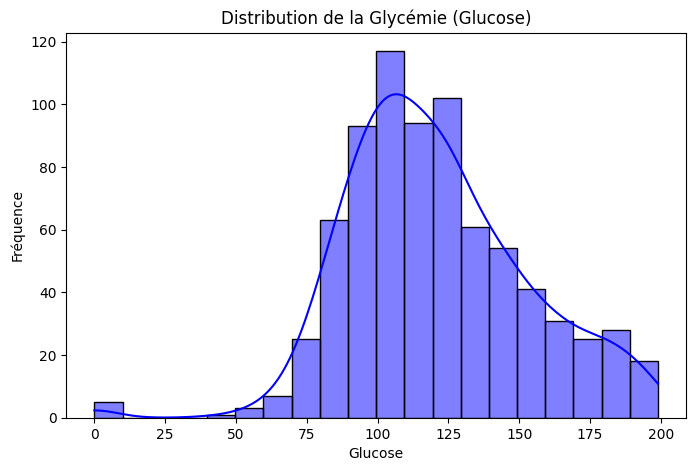

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_pandas['Glucose'], bins=20, kde=True, color='blue')
plt.title('Distribution de la Glycémie (Glucose)')
plt.xlabel('Glucose')
plt.ylabel('Fréquence')
plt.show()


**-Courbe de BMI en fonction de l'âge:**

<ipython-input-17-c8216ce66997>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='BMI', data=df_pandas, marker='o', ci=None)


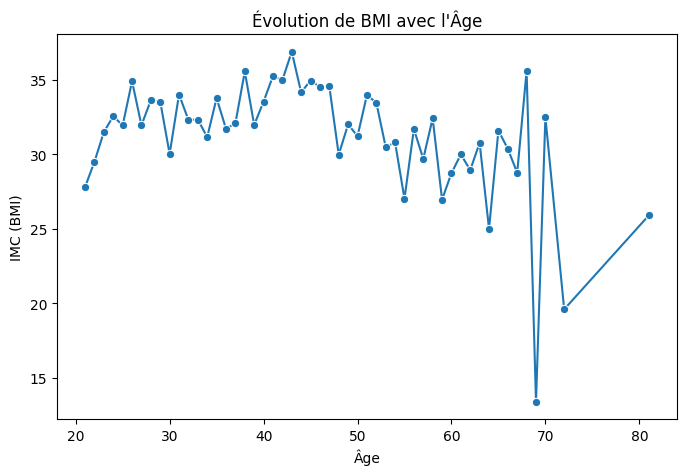

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Age', y='BMI', data=df_pandas, marker='o', ci=None)
plt.title('Évolution de BMI avec l\'Âge')
plt.xlabel('Âge')
plt.ylabel('IMC (BMI)')
plt.show()


# **Boîte à moustaches :**

**-Répartition de l'insuline (Insulin) par Outcome:**

<ipython-input-11-55c0366bbb9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Insulin', data=df_pandas, palette='pastel')


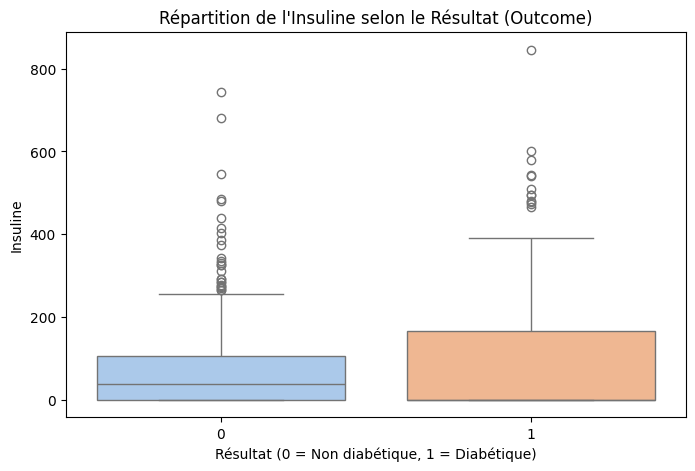

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Insulin', data=df_pandas, palette='pastel')
plt.title('Répartition de l\'Insuline selon le Résultat (Outcome)')
plt.xlabel('Résultat (0 = Non diabétique, 1 = Diabétique)')
plt.ylabel('Insuline')
plt.show()


**-Moyenne de Glucose et BMI par Outcome :**

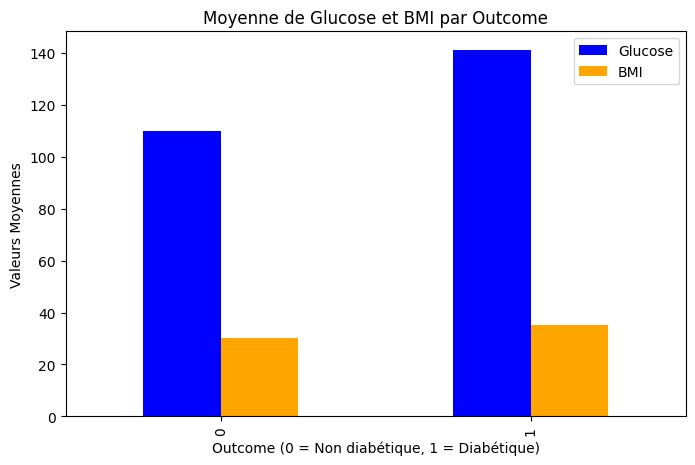

In [ ]:
import pandas as pd

# Calcul des moyennes
grouped_data = df_pandas.groupby('Outcome').mean()[['Glucose', 'BMI']]

# Tracer
grouped_data.plot(kind='bar', figsize=(8, 5), color=['blue', 'orange'])
plt.title('Moyenne de Glucose et BMI par Outcome')
plt.xlabel('Outcome (0 = Non diabétique, 1 = Diabétique)')
plt.ylabel('Valeurs Moyennes')
plt.show()


**Matrice de corrélation entre les colonnes :**

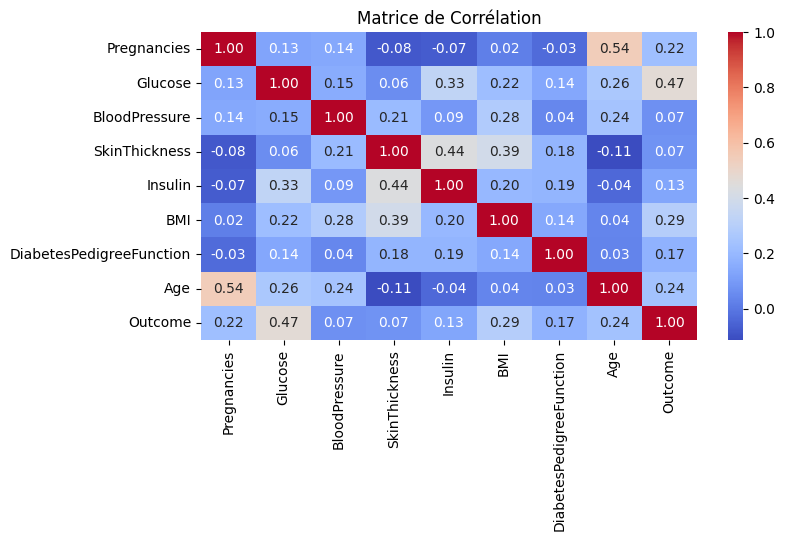

In [ ]:
plt.figure(figsize=(8, 4))
correlation = df_pandas.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()
